[![Jupyter Notebook](https://img.shields.io/badge/Jupyter%20Notebook-orange)](https://github.com/laminlabs/cellxgene-census-lamin/blob/main/docs/03-cellxgene-census.ipynb)
[![census](https://img.shields.io/badge/laminlabs/cellxgene--census-mediumseagreen)](https://lamin.ai/laminlabs/cellxgene-census)

# cellxgene-census

`cellxgene-census` is a Python client to query the concatenated cellxgene datasets.

This notebook shows how to query registered h5ad files from metadata.

For more background, see:

- [CELLxGENE Census](https://chanzuckerberg.github.io/cellxgene-census/)
- [TileDB-SOMA](https://github.com/single-cell-data/TileDB-SOMA)

## Setup



First, load the public instance:

In [1]:
!lamin load laminlabs/cellxgene-census

💡 loaded instance: laminlabs/cellxgene-census


In [2]:
import lamindb as ln
import lnschema_bionty as lb

💡 loaded instance: laminlabs/cellxgene-census (lamindb 0.57.2)


In [3]:
lb.settings.organism = "human"

## Search metadata

In [4]:
lb.CellType.search("effector Tcell").head()

,uid,synonyms,score
name,,,
effector T cell,yvHkIrVI,effector T-lymphocyte|effector T-cell|effector...,96.6
cell,Ry0JGwSD,,90.0
"CD8-positive, alpha-beta cytokine secreting effector T cell",pam4JjkW,"CD8-positive, alpha-beta cytokine secreting ef...",85.5
"effector CD4-positive, alpha-beta T cell",tQZFurra,"effector CD4-positive, alpha-beta T-lymphocyte...",85.5
"effector CD8-positive, alpha-beta T cell",o9T53Uso,"effector CD8-positive, alpha-beta T-lymphocyte...",85.5


## Ontological hierarchies

In [5]:
teff = lb.CellType.filter(uid="yvHkIrVI").one()

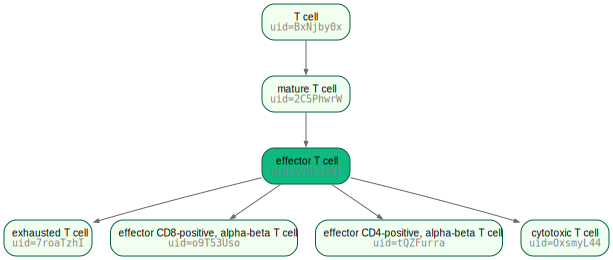

In [6]:
teff.view_parents(distance=2, with_children=True)

In [7]:
teff.children.df()

,uid,name,ontology_id,abbr,synonyms,description,bionty_source_id,updated_at,created_by_id
id,,,,,,,,,
4,7roaTzhI,exhausted T cell,CL:0011025,None,An effector T cell that displays impaired effe...,None,20,2023-10-16 17:05:25,1
278,o9T53Uso,"effector CD8-positive, alpha-beta T cell",CL:0001050,None,"effector CD8-positive, alpha-beta T-lymphocyte...","A Cd8-Positive, Alpha-Beta T Cell With The Phe...",20,2023-10-16 17:05:25,1
317,tQZFurra,"effector CD4-positive, alpha-beta T cell",CL:0001044,None,"effector CD4-positive, alpha-beta T-lymphocyte...","A Cd4-Positive, Alpha-Beta T Cell With The Phe...",20,2023-10-16 17:05:25,1
437,OxsmyL44,cytotoxic T cell,CL:0000910,None,cytotoxic T lymphocyte|cytotoxic T-lymphocyte|...,A Mature T Cell That Differentiated And Acquir...,20,2023-10-16 17:05:25,1


## Query h5ad files by metadata

In [8]:
features = ln.Feature.lookup()
assays = lb.ExperimentalFactor.lookup()
cell_types = lb.CellType.lookup()
tissues = lb.Tissue.lookup()
ulabels = ln.ULabel.lookup()
suspension_types = ulabels.is_suspension_type.children.all().lookup()

In [9]:
census_version = "2023-07-25"
dataset = ln.Dataset.filter(name="cellxgene-census", version=census_version).one()
dataset

Dataset(uid='EAUF1AaT4kOVyHYnZsUJ', name='cellxgene-census', version='2023-07-25', hash='pEJ9uvIeTLvHkZW2TBT5', updated_at=2023-10-24 16:00:07, transform_id=1, run_id=9, created_by_id=2)

In [14]:
query = (
    dataset.files.filter(
        organism=lb.settings.organism,
        cell_types__in=[cell_types.dendritic_cell, cell_types.neutrophil],
        tissues=tissues.kidney,
        ulabels=suspension_types.cell,
        experimental_factors=assays.ln_10x_3_v2,
    )
    .order_by("size")
    .distinct()
)

Display all search result as a `DataFrame`:

In [15]:
query.df()

,uid,storage_id,key,suffix,accessor,description,version,size,hash,hash_type,transform_id,run_id,initial_version_id,updated_at,created_by_id
id,,,,,,,,,,,,,,,
847,BEndTAjLN1oFOgn84cpM,2,cell-census/2023-07-25/h5ads/20d87640-4be8-487...,.h5ad,AnnData,Mature kidney dataset: immune|20d87640-4be8-48...,None,44647761,dAApZI2IZr64F5b1jDMgtA-6,md5-n,1,1,None,2023-10-16 17:04:08,1
27,uzMa01sM040ZZ4mJqHjI,2,cell-census/2023-07-25/h5ads/2d31c0ca-0233-41c...,.h5ad,AnnData,Fetal kidney dataset: immune|2d31c0ca-0233-41c...,None,64056560,YjLm7iPkIFIEYimgQEfJSA-8,md5-n,1,1,None,2023-10-16 17:04:08,1
32,6DepavbfBwYO2T54viZr,2,cell-census/2023-07-25/h5ads/9ea768a2-87ab-46b...,.h5ad,AnnData,Mature kidney dataset: full|9ea768a2-87ab-46b6...,None,192484358,odAyLe_6uoRCQV5eJRijqQ-23,md5-n,1,1,None,2023-10-16 17:04:08,1
119,VpfQuZTloenoMKmoJCYR,2,cell-census/2023-07-25/h5ads/105c7dad-0468-462...,.h5ad,AnnData,mature|105c7dad-0468-4628-a5be-2bb42c6a8ae4,None,232722706,3yOOhI-gP3TlpyLcDNUTBA-28,md5-n,1,1,None,2023-10-16 17:04:08,1
673,8vDeVtPTdjqALZvivlJ9,2,cell-census/2023-07-25/h5ads/d7dcfd8f-2ee7-438...,.h5ad,AnnData,Fetal kidney dataset: full|d7dcfd8f-2ee7-4385-...,None,341214674,R8-G4h5ztVfX29r58T4g_Q-41,md5-n,1,1,None,2023-10-16 17:04:08,1
84,cuDo9He04Jkcb7jp6i1N,2,cell-census/2023-07-25/h5ads/a51c6ece-5731-412...,.h5ad,AnnData,fetal|a51c6ece-5731-4128-8c1e-5060e80c69e4,None,355416375,ZnFXcJVMpydqZ4IUoH1WuQ-43,md5-n,1,1,None,2023-10-16 17:04:08,1
716,KkdXjqamofV2ccSDzZdx,2,cell-census/2023-07-25/h5ads/2aa1c93c-4ef3-4e9...,.h5ad,AnnData,Myeloid cells|2aa1c93c-4ef3-4e9a-98e7-0bd37933...,None,2384772006,MDY4TNmLdD-GQdzNkYEknQ-285,md5-n,1,1,None,2023-10-16 17:04:08,1
755,N6Yoh8IOLjnjSqsXxdAc,2,cell-census/2023-07-25/h5ads/48101fa2-1a63-451...,.h5ad,AnnData,HSC/immune cells (all hematopoietic-derived ce...,None,6214230662,1MB5sW58f0xb3o5D4SQs5Q-741,md5-n,1,1,None,2023-10-16 17:04:08,1
161,ffkuSnH5crI4qUTezTab,2,cell-census/2023-07-25/h5ads/fd072bc3-2dfb-46f...,.h5ad,AnnData,Full dataset of single-cell RNA-seq profiles f...,None,9582395846,vn2qUt-U428uhKIsz-T5ZA-1143,md5-n,1,1,None,2023-10-16 17:04:08,1


## Access a queried h5ad file

In [16]:
file = query.first()
file

File(uid='BEndTAjLN1oFOgn84cpM', key='cell-census/2023-07-25/h5ads/20d87640-4be8-487f-93d4-dce38378d00f.h5ad', suffix='.h5ad', accessor='AnnData', description='Mature kidney dataset: immune|20d87640-4be8-487f-93d4-dce38378d00f', size=44647761, hash='dAApZI2IZr64F5b1jDMgtA-6', hash_type='md5-n', updated_at=2023-10-16 15:04:08, storage_id=2, transform_id=1, run_id=1, created_by_id=1)

Optionally, [search a file on the UI](https://lamin.ai/laminlabs/cellxgene-census/records/core/File) and fetch it through uid: 
`ln.File.filter(uid="...").one()`

Or, query for a collection you found on [CZ CELLxGENE Discover](https://cellxgene.cziscience.com/collections):

Note that most recent collections may not have been added yet.

In [ ]:
ln.File.filter(ulabels__name="Spatiotemporal immune zonation of the human kidney").df()

Describe all linked metadata:

In [ ]:
file.describe()

Access all registered features (standardized obs columns):

In [ ]:
file.features

Get labels from a feature:

In [ ]:
features = ln.Feature.lookup()

In [ ]:
# tissues
file.labels.get(features.tissue).df()

In [ ]:
# check the corresponding collection/publication
file.labels.get(features.collection).one()

Use `file.backed()`, `file.load()` to access the underlying `h5ad` file:

See {class}`~lamindb.File` for details.

In [ ]:
file.backed()

In [ ]:
adata = file.load()

In [ ]:
adata

If you are interested in how the human part of the instance was created: see {doc}`census-registries`.

If you are interested in querying from `cellxgene-census` using LaminDB registries: see {doc}`query-census`.

If you want to see the full docs, see [here](https://cellxgene-census-lamin-c192.netlify.app/notebooks).

```{toctree}
:maxdepth: 1
:hidden:

census-registries
query-census
```